In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np
import pandas_datareader.data as web
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 50)

# Question 3

\begin{align*}
x_t &= 1.5x_{t-1} - 0.5x_{t-2} + e_t - 0.5e_{t-1} \\
&\Rightarrow (1 - \frac{3}{2}L + \frac{1}{2}L^2)x_t = (1 - \frac{1}{2}L)e_t \\
&\Rightarrow (1 - \frac{1}{2}L)(1 - L)x_t = (1 - \frac{1}{2}L)e_t \\
&\Rightarrow (1 - L)x_t = \left[\frac{(1 - \frac{1}{2}L)}{(1 - \frac{1}{2}L)}\right]e_t \\
\end{align*}


Let $g(L) = \frac{(1 - \frac{1}{2}L)}{(1 - \frac{1}{2}L)}$. 

Then
$g(L) = (1 - \frac{1}{2}L)(1 + \frac{1}{2}L + \frac{1}{2^2}L^2 + \frac{1}{2^3}L^3 + \ldots)$ = $(1 + \frac{1}{2}L - \frac{1}{2}L + \frac{1}{2^2}L^2 - \frac{1}{2^2}L^2 + \frac{1}{2^3}L^3 - \frac{1}{2^3}L^3 + \ldots) = 1$

Thus,
$(1 - L)x_t = 1 \cdot e_t \Rightarrow x_t = x_{t-1} + e_t$

**Hence, $x_t$ is similar to a random walk.**

# Question 4

## Part (a)

\begin{align*}
z_t &= x_t + y_t \\
&\Rightarrow z_t = (\phi x_{t-1} + \phi y_{t-1}) + e_t + w_t \\
&\Rightarrow z_t = \phi(x_{t-1} + y_{t-1}) + e_t + w_t \\
&\Rightarrow z_t = \phi z_{t-1} + e_t + w_t \\
\end{align*}

As $e_t + w_t$ is still a white noise (since it has finite mean, variance, unconditional and conditional expectation is zero, independent with previous shocks $w_{t-1} + e_{t-1}$, and has constant conditional and unconditional variance), we can write

$z_t = \phi z_{t-1} + u_t$ where $u_{t}$ is a white noise, hence $z_{t}$ is AR(1) process


## Part (b)

\begin{align*}
(1-\phi L)x_t &= e_t \\
(1-\psi L)x_t &= w_t \\
\end{align*}

Multiply the first by $(1-\psi L)$ and the second by $(1-\phi L)$, hence, we have

\begin{align*}
(1-\psi L)(1-\phi L)x_t &= (1-\psi L)e_t \\
(1-\phi L)(1-\psi L)x_t &= (1-\phi L)w_t \\
\end{align*}

Adding the two processes above, we get

\begin{align*}
(2-\psi L-\phi L+2\psi\phi L^2)x_t &= (1-\psi L)e_t+(1-\phi L)w_t \\
\end{align*}

$(1-\psi L)e_t$ is a MA(1) process, and $(1-\phi L)w_t$ is another MA(1) process. Hence, by results of the sum of two MA(1) processes (Hamilton ch 4.7), we have 

$(1-\psi L)e_t+(1-\phi L)w_t=MA(\max(1,1))=MA(1)$

Hence the process for $x_t$ becomes 

$(2-\psi L-\phi L+2\psi\phi L^2)x_t = (1-kL)u_t$

For some $k$ and white noise $u_t$. 

**Hence $x_t$ is an AR(2,1) process.**


## Question 6

In [10]:
def generate_AR1(phi,shocks):
    ts=np.zeros(len(shocks))
    for i in range(2,len(ts),1):
        ts[i]=phi*ts[i-1]+shocks[i]
    return ts

def generate_normal_shocks(T,mean=0,std=1):
    #np.random.seed(42)
    return np.random.normal(loc=0,scale=1,size=T)

def simulate_AR1(phis=[0.9,0.99,0.99999,1.],nsamples=5,T=100):
    
    fig,axis = plt.subplots(nrows=len(phis),ncols=1,figsize=(10,10))
    labels = [f'sample_{i}' for i in range(nsamples)]
    
    sampled_points = {f'phi={phis[j]}':np.zeros([nsamples,T]) for j in range(len(phis))}
    
    for i in range(nsamples):
        e_t = generate_normal_shocks(T)
        
        for j in range(len(phis)):
            x_t = generate_AR1(phis[j],e_t)
            
            axis[j].plot(x_t,label=labels[i])
            axis[j].title.set_text(f'phi={phis[j]}')
            sampled_points[f'phi={phis[j]}'][i] = x_t
            
    plt.legend(loc=2)
    plt.show()
    return sampled_points



==== starting simulation for sample size = 100 ====


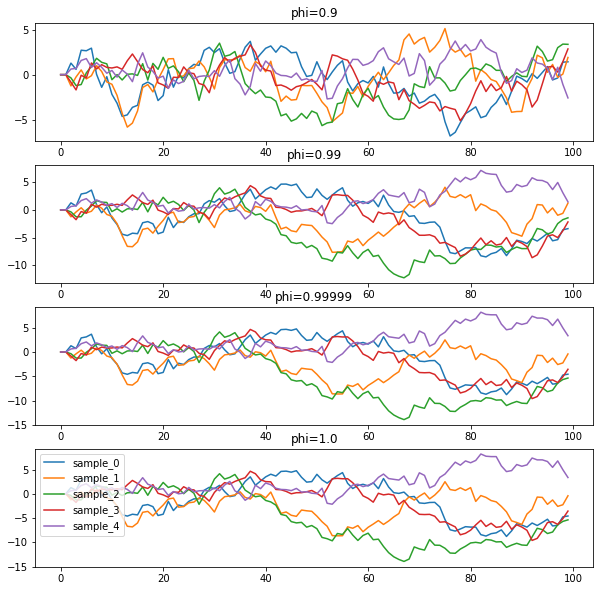

### Summary stats for phi=0.9 ###
Average expected value of x_t = -0.33661610015640137
Average standard deviation of x_t = 1.7542286180213051
Theoretical mean = 0
Theoretical std is 2.294157338705618
### Summary stats for phi=0.99 ###
Average expected value of x_t = -1.2622624305357462
Average standard deviation of x_t = 3.1165903493943263
Theoretical mean = 0
Theoretical std is 7.088812050083353
### Summary stats for phi=0.99999 ###
Average expected value of x_t = -1.565328988076092
Average standard deviation of x_t = 3.583963312780203
Theoretical mean = 0
Theoretical std is 223.60735676962474
### Summary stats for phi=1.0 ###
Average expected value of x_t = -1.5656809454277134
Average standard deviation of x_t = 3.5845419297863117
Theoretical mean = 0
Theoretical std is inf


==== starting simulation for sample size = 1000 ====


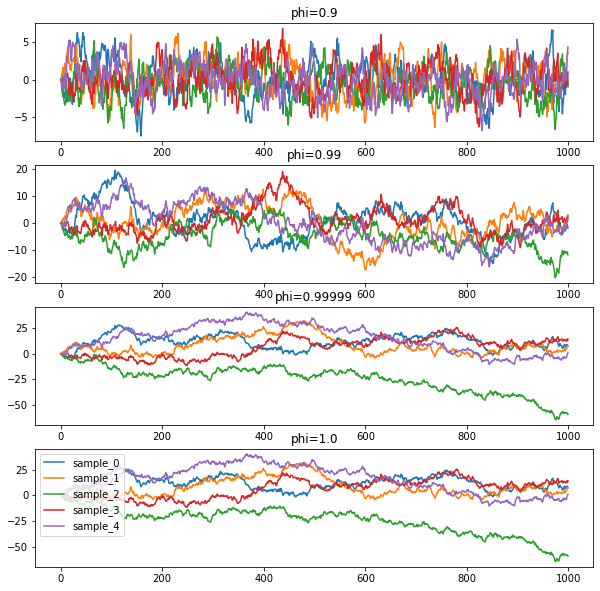

### Summary stats for phi=0.9 ###
Average expected value of x_t = -0.07118556438047811
Average standard deviation of x_t = 1.850468608742308
Theoretical mean = 0
Theoretical std is 2.294157338705618
### Summary stats for phi=0.99 ###
Average expected value of x_t = -0.47673361872298997
Average standard deviation of x_t = 5.266010757538179
Theoretical mean = 0
Theoretical std is 7.088812050083353
### Summary stats for phi=0.99999 ###
Average expected value of x_t = 3.3132132045255607
Average standard deviation of x_t = 16.260749879776345
Theoretical mean = 0
Theoretical std is 223.60735676962474
### Summary stats for phi=1.0 ###
Average expected value of x_t = 3.337698237687491
Average standard deviation of x_t = 16.31667950679751
Theoretical mean = 0
Theoretical std is inf


==== starting simulation for sample size = 10000 ====


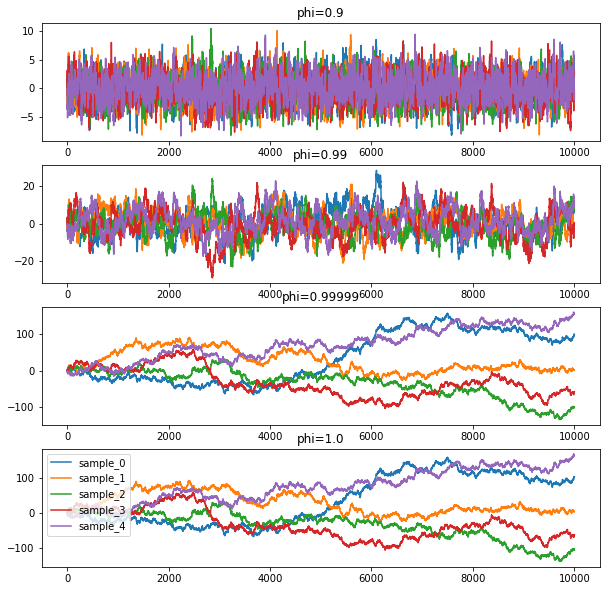

### Summary stats for phi=0.9 ###
Average expected value of x_t = 0.02004005514972312
Average standard deviation of x_t = 1.9279074358177968
Theoretical mean = 0
Theoretical std is 2.294157338705618
### Summary stats for phi=0.99 ###
Average expected value of x_t = 0.15100663952024762
Average standard deviation of x_t = 5.692432969104422
Theoretical mean = 0
Theoretical std is 7.088812050083353
### Summary stats for phi=0.99999 ###
Average expected value of x_t = 13.318533372912187
Average standard deviation of x_t = 55.221969810117876
Theoretical mean = 0
Theoretical std is 223.60735676962474
### Summary stats for phi=1.0 ###
Average expected value of x_t = 13.877414380755429
Average standard deviation of x_t = 56.39737621890521
Theoretical mean = 0
Theoretical std is inf


In [11]:
def print_summary_stats(samples):
    import regex as re
    for key,value in samples.items():
        print(f'### Summary stats for {key} ###')
        print(f'Average expected value of x_t = {value.mean(axis=0).mean()}')
        print(f'Average standard deviation of x_t = {value.std(axis=0).mean()}')
        print(f'Theoretical mean = 0')
        phi = (float)(re.findall('[.\d]+',string=key)[0])
        try:
            theo_std = np.sqrt(1/(1-phi**2))
        except:
            theo_std = np.inf
        print(f'Theoretical std is {theo_std}')

Time_periods = [100,1000,10000]
for i,T in enumerate(Time_periods):
    print('\n')
    print(f'==== starting simulation for sample size = {Time_periods[i]} ====')
    sampled_points = simulate_AR1(T=T)
    print_summary_stats(sampled_points)

For Normal Shocks, we have the following observation:

1. Extent of persistence increases as phi increases
2. Observed sample mean is close tp theoretical mean for large sample sizes and small phi
2. Observed sample std is close tp theoretical std for large sample sizes and small phi


## Question  7

In [12]:
def generate_AR1(phi,shocks):
    ts=np.zeros(len(shocks))
    for i in range(2,len(ts),1):
        ts[i]=phi*ts[i-1]+shocks[i]
    return ts

def generate_normal_shocks(T,mean=0,std=1):
    #np.random.seed(42)
    return np.random.standard_cauchy(size=T)

def simulate_AR1(phis=[0.9,0.99,0.99999,1.],nsamples=5,T=100):
    
    fig,axis = plt.subplots(nrows=len(phis),ncols=1,figsize=(10,10))
    labels = [f'sample_{i}' for i in range(nsamples)]
    
    sampled_points = {f'phi={phis[j]}':np.zeros([nsamples,T]) for j in range(len(phis))}
    
    for i in range(nsamples):
        e_t = generate_normal_shocks(T)
        
        for j in range(len(phis)):
            x_t = generate_AR1(phis[j],e_t)
            
            axis[j].plot(x_t,label=labels[i])
            axis[j].title.set_text(f'phi={phis[j]}')
            sampled_points[f'phi={phis[j]}'][i] = x_t
            
    plt.legend(loc=2)
    plt.show()
    return sampled_points



==== starting simulation for sample size = 100 ====


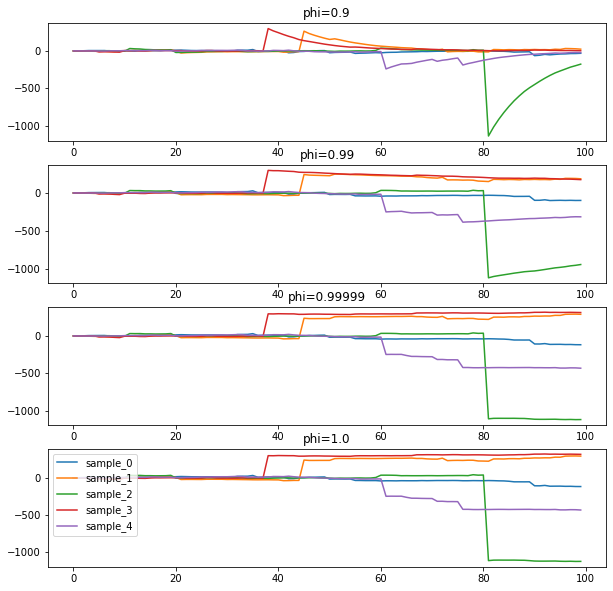

### Summary stats for phi=0.9 ###
Average expected value of x_t = -17.605425215921088
Average standard deviation of x_t = 70.91179133760906
Theoretical mean = 0
Theoretical std is inf
### Summary stats for phi=0.99 ###
Average expected value of x_t = -16.84612927690697
Average standard deviation of x_t = 154.74091988444437
Theoretical mean = 0
Theoretical std is inf
### Summary stats for phi=0.99999 ###
Average expected value of x_t = -9.649189814692447
Average standard deviation of x_t = 178.56804318284526
Theoretical mean = 0
Theoretical std is inf
### Summary stats for phi=1.0 ###
Average expected value of x_t = -9.639589631891994
Average standard deviation of x_t = 178.59558285397122
Theoretical mean = 0
Theoretical std is inf


==== starting simulation for sample size = 1000 ====


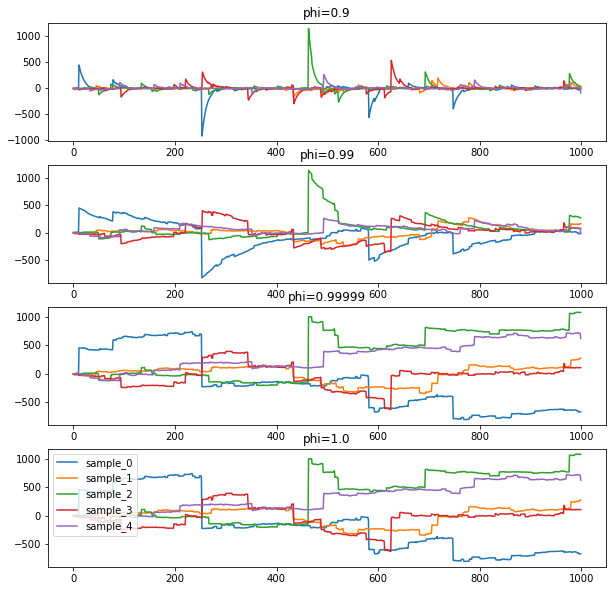

### Summary stats for phi=0.9 ###
Average expected value of x_t = 2.8831437495469103
Average standard deviation of x_t = 35.92025708143726
Theoretical mean = 0
Theoretical std is inf
### Summary stats for phi=0.99 ###
Average expected value of x_t = 18.77172098173407
Average standard deviation of x_t = 138.70062941508326
Theoretical mean = 0
Theoretical std is inf
### Summary stats for phi=0.99999 ###
Average expected value of x_t = 85.95137204037246
Average standard deviation of x_t = 344.8013819552654
Theoretical mean = 0
Theoretical std is inf
### Summary stats for phi=1.0 ###
Average expected value of x_t = 86.29774885968172
Average standard deviation of x_t = 345.1924948228825
Theoretical mean = 0
Theoretical std is inf


==== starting simulation for sample size = 10000 ====


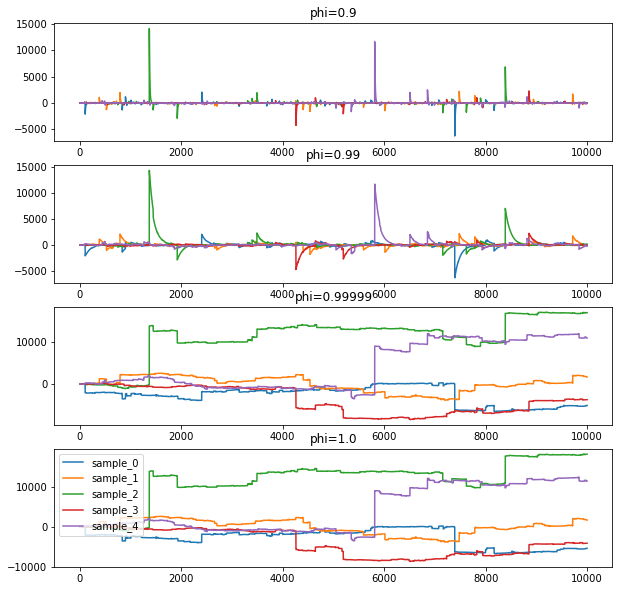

### Summary stats for phi=0.9 ###
Average expected value of x_t = 4.354903251761558
Average standard deviation of x_t = 65.77350721929913
Theoretical mean = 0
Theoretical std is inf
### Summary stats for phi=0.99 ###
Average expected value of x_t = 43.71447885027504
Average standard deviation of x_t = 374.5229861781172
Theoretical mean = 0
Theoretical std is inf
### Summary stats for phi=0.99999 ###
Average expected value of x_t = 1714.1679776414226
Average standard deviation of x_t = 6093.399331371929
Theoretical mean = 0
Theoretical std is inf
### Summary stats for phi=1.0 ###
Average expected value of x_t = 1776.4120719459295
Average standard deviation of x_t = 6285.96778038547
Theoretical mean = 0
Theoretical std is inf


In [13]:
def print_summary_stats(samples):
    import regex as re
    for key,value in samples.items():
        print(f'### Summary stats for {key} ###')
        print(f'Average expected value of x_t = {value.mean(axis=0).mean()}')
        print(f'Average standard deviation of x_t = {value.std(axis=0).mean()}')
        print(f'Theoretical mean = 0')
        phi = (float)(re.findall('[.\d]+',string=key)[0])
        print(f'Theoretical std is {np.inf}')

Time_periods = [100,1000,10000]
for i,T in enumerate(Time_periods):
    print('\n')
    print(f'==== starting simulation for sample size = {Time_periods[i]} ====')
    sampled_points = simulate_AR1(T=T)
    print_summary_stats(sampled_points)

For Cauchy Shocks, we have the following observation:

1. Cauchy distribution has infinite mean & variance, hence it is not a white noise
2. Consequently, the means of x_t is not defined and we see that they vary wildly across samples
2. Theoretical standard dev of x_t is close to infinity, and we observe rapid spikes in TS-plot which sometimes quickly drops back to low values


# Question 8

## Part (a)

In [28]:
#!pip install python-dotenv

You should consider upgrading via the '/Users/ishan/opt/anaconda3/bin/python -m pip install --upgrade pip' command.


In [32]:
import dotenv
dotenv.load_dotenv()

True

In [33]:
symbol_1 = 'MULTPL/SP500_DIV_YIELD_MONTH'
symbol_2 = 'MULTPL/SP500_DIV_YIELD_YEAR'
import datetime as dt

div_yield_month = web.DataReader(symbol_1, 'quandl', 
                               start='1881-01-01', 
                               end=dt.date.today(), 
                               api_key=os.getenv('API_KEY'))

div_yield_year = web.DataReader(symbol_2, 'quandl', 
                               start='1881-01-01', 
                               end=dt.date.today(), 
                               api_key=os.getenv('API_KEY'))

In [39]:
div_yield_month.head()

,Value
Date,
2023-12-31,1.51
2023-12-01,1.51
2023-11-30,1.55
2023-11-01,1.62
2023-10-31,1.62


In [38]:
div_yield_year.head()

,Value
Date,
2024-01-31,1.45
2023-12-31,1.50
2023-12-01,1.51
2023-11-30,1.52
2023-11-01,1.62


Text(0.5, 1.0, 'Monthly dividends')

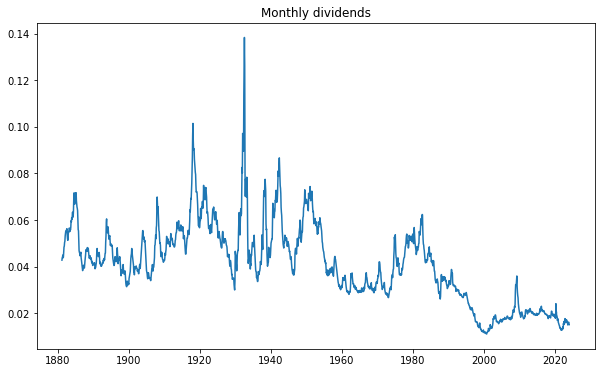

In [61]:
plt.figure(figsize=(10,6))
plt.plot(div_yield_month/100)
plt.title('Monthly dividends')

Text(0.5, 1.0, 'Yearly dividends')

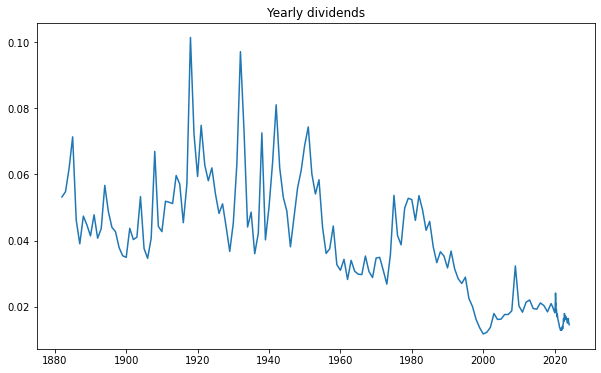

In [62]:
plt.figure(figsize=(10,6))
plt.plot(div_yield_year/100)
plt.title('Yearly dividends')

We see that the monthly dividend yields (in %) for SP500 have variation range from around 0.01 to 0.15, this is almost 10 fold change.

Hence, we would benefit from taking log of dividend yields which makes the variation lower and somewhat symmetric from -4 to 2 (see below). We have a similar observation for yearly dividend yields.

Text(0.5, 1.0, 'Log monthly dividends')

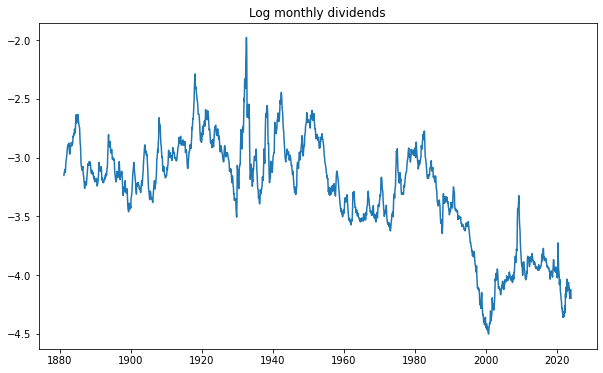

In [63]:
plt.figure(figsize=(10,6))
log_sp500_div_month = np.log(div_yield_month/100)
plt.plot(log_sp500_div_month)
plt.title('Log monthly dividends')

Text(0.5, 1.0, 'Log Yearly dividends')

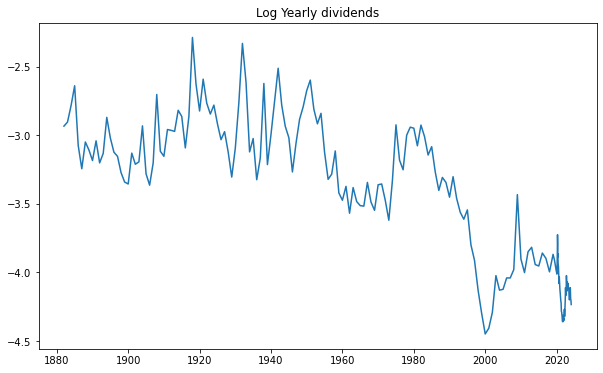

In [64]:
plt.figure(figsize=(10,6))
log_sp500_div_year = np.log(div_yield_year/100)
plt.plot(log_sp500_div_year)
plt.title('Log Yearly dividends')

In [65]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

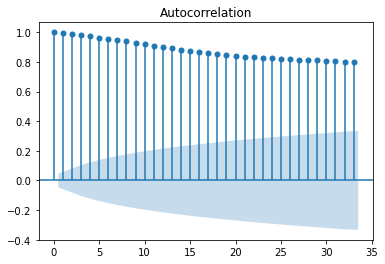

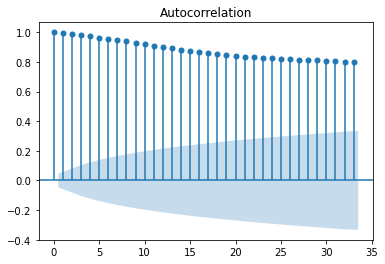

In [66]:
plot_acf(log_sp500_div_month)

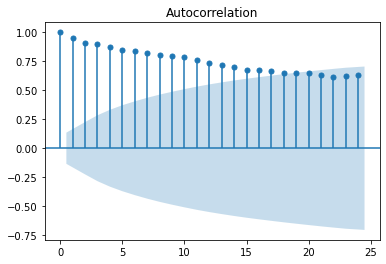

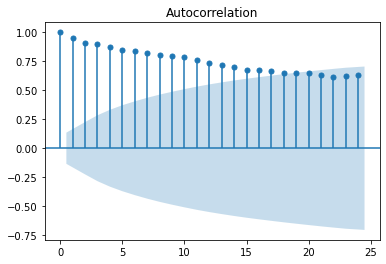

In [67]:
plot_acf(log_sp500_div_year)

From the Autocorrelation plots above, we conclude that monthly dividend yield have stronger level of persistence than yearly yields, as evident from higher number of significant lags

## Part (b)

In [101]:
def calc_corr(series1,series2):
    return np.corrcoef(series1, series2)[0][1]

def compute_Ljung_box(sample,nlags=10):
    q=0
    T=len(sample)
    for i in range(1,nlags+1,1):
       q+=(calc_corr(sample[i:],sample[:-i])/(T-i))
    return T*(T+2)*q

def test_correlations(sample,nlags):
    from scipy.stats import chi2
    critical = chi2.ppf(0.95, nlags)
    test_stat=compute_Ljung_box(sample,nlags)
    print(f'critical value ={critical}, test_stat = {test_stat}, p-value= {1 - chi2.cdf(test_stat, nlags)}')
    if test_stat>critical:
        print(f'Ljung Box Test result, {nlags} lags are not jointly zero')
    else:
        print(f'Ljung Box Test result, {nlags} lags are jointly zero')

In [102]:
test_correlations(log_sp500_div_month.Value.values,10)

critical value =18.307038053275146, test_stat = 16950.57698044137, p-value= 0.0
Ljung Box Test result, 10 lags are not jointly zero


In [103]:
test_correlations(log_sp500_div_year.Value.values,10)

critical value =18.307038053275146, test_stat = 1938.0290361545756, p-value= 0.0
Ljung Box Test result, 10 lags are not jointly zero


## Part (c)

From the plots above and the box test conducted previously, we conclude that the 10 lags are significant for both yearly and monthly dividends. The value of test statistic suggests a very strong persistence effect of 10 lags for div_month. 